# Objectives
1. Read a .csv file into a pandas DataFrame
2. Examine a dataset
3. Experiment with different features in building a model
4. Tune hyperparameters

In [18]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

#adjust the granularity of reporting
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## Load .csv file (dataset) into a pandas DataFrame

In [32]:
#import the dataset 
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

#scale the label
training_df["median_house_value"] /= 1000.0

#print first row of DataFrame
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


## Examine the dataset
#### count:
number of rows in every column. Ideally same value for every column.
#### mean & std:
mean and standard deviation of the values in each column
#### min & max:
lowest and highest values in each column
#### 25%, 50%, 75%:
contains various quantiles

In [33]:
#get statistics on the dataset
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


The maximum value (max) of several columns seems very high compared to the other quantiles. For example, the total_rooms column. Given the quantile values (25%, 50%, and 75%), you might expect the  max value of total_rooms to be approximately  5,000 or possibly 10,000. However, the max value  is actually 37,937 When you see anomalies in a column, become more careful about using that column as a feature. That said, anomalies in potential features sometimes mirror  anomalies in the label, which could make the column  be (or seem to be) a powerful feature. Also, you  might be able to represent (pre-process) raw data  in order to make columns into useful features.

## Define functions to build and train model

In [39]:
def build_model(my_learning_rate):
    
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(units=1,
                                   input_shape=(1,)))
    
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                 loss="mean_squared_error",
                 metrics=[tf.keras.metrics.RootMeanSquaredError()])
    
    return model

def train_model(model, df, feature, label, epochs, batch_size):
    
    history = model.fit(x=df[feature],
                       y=df[label],
                       batch_size=batch_size,
                       epochs=epochs)
    
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]
    
    epochs = history.epoch
    
    hist = pd.DataFrame(history.history)
    
    rmse = hist["root_mean_squared_error"]
    
    return trained_weight, trained_bias, epochs, rmse

print("Defined the build_model and train_model functions.")


Defined the build_model and train_model functions.


## Define plotting functions

In [42]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    
    plt.xlabel(feature)
    plt.ylabel(label)
    
    #create a scatter plot from 200 random points of the dataset
    random_examples = training_df.sample(n=200)
    plt.scatter(random_examples[feature], random_examples[label])
    
    
    x0 = 0
    y0 = trained_bias
    x1 = 10000
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c = 'r')
    
    plt.show()
    
def plot_the_loss_curve(epochs, rmse):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")
    
    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min()*0.97, rmse.max()])
    plt.show()
    
print("Defined the plot_the_model and plot_the_loss_curve functions")

Defined the plot_the_model and plot_the_loss_curve functions


## call the model functions

Epoch 1/80
567/567 [==============================] - 0s 465us/step - loss: 28434.8438 - root_mean_squared_error: 168.6263
Epoch 2/80
567/567 [==============================] - 0s 459us/step - loss: 27653.5234 - root_mean_squared_error: 166.2935
Epoch 3/80
567/567 [==============================] - 0s 454us/step - loss: 26991.8613 - root_mean_squared_error: 164.2920
Epoch 4/80
567/567 [==============================] - 0s 459us/step - loss: 26149.5195 - root_mean_squared_error: 161.7081
Epoch 5/80
567/567 [==============================] - 0s 451us/step - loss: 25268.0527 - root_mean_squared_error: 158.9593
Epoch 6/80
567/567 [==============================] - 0s 459us/step - loss: 24972.2422 - root_mean_squared_error: 158.0261
Epoch 7/80
567/567 [==============================] - 0s 443us/step - loss: 24292.7852 - root_mean_squared_error: 155.8614
Epoch 8/80
567/567 [==============================] - 0s 452us/step - loss: 23522.2949 - root_mean_squared_error: 153.3698
Epoch 9/80
567/5

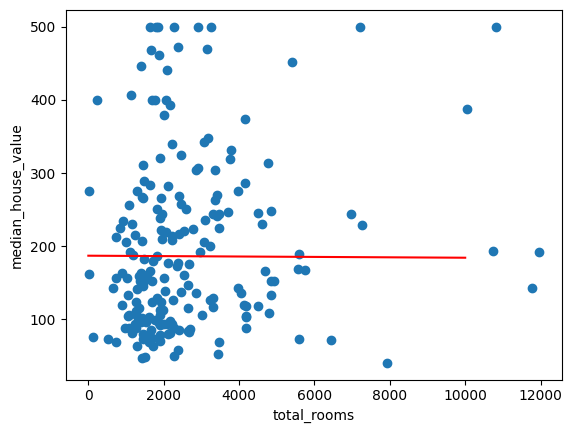

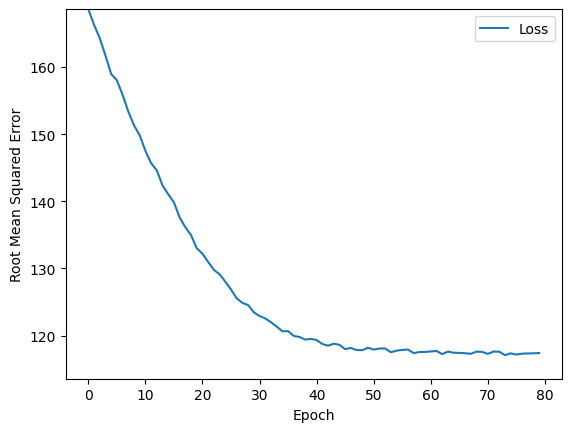

In [47]:
learning_rate = 0.01
epochs = 80
batch_size = 30

my_feature = "total_rooms"
my_label = "median_house_value"

my_model = None

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" %weight)
print("The learned bias for your model is %.4f\n" %bias)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

## Use the model for prediction

In [62]:
def predict_house_values(n, feature, label):
    
    batch = training_df[feature][10000:10000+n]
    predicted_values = my_model.predict_on_batch(x=batch)
    
    print("feature label   predicted")
    print("\t\tvalue")
    print("\t\tin thousand$")
    print("-----------------------------")
    for i in range(n):
        print("%5.0f %6.0f %15.0f" %(training_df[feature][10000+i],
                                    training_df[label][10000+i],
                                    predicted_values[i][0]))

In [63]:
predict_house_values(10, my_feature, my_label)

feature label   predicted
		value
		in thousand$
-----------------------------
 1960     53             186
 3400     92             186
 3677     69             186
 2202     62             186
 2403     80             186
 5652    295             185
 3318    500             186
 2552    342             186
 1364    118             186
 3468    128             186


## Different feature

Epoch 1/30
5667/5667 [==============================] - 3s 437us/step - loss: 30860.8301 - root_mean_squared_error: 175.6725
Epoch 2/30
5667/5667 [==============================] - 3s 449us/step - loss: 25646.0781 - root_mean_squared_error: 160.1439
Epoch 3/30
5667/5667 [==============================] - 3s 443us/step - loss: 22139.8066 - root_mean_squared_error: 148.7945
Epoch 4/30
5667/5667 [==============================] - 3s 446us/step - loss: 19385.5391 - root_mean_squared_error: 139.2320
Epoch 5/30
5667/5667 [==============================] - 3s 444us/step - loss: 17494.5488 - root_mean_squared_error: 132.2670
Epoch 6/30
5667/5667 [==============================] - 3s 443us/step - loss: 16245.8369 - root_mean_squared_error: 127.4592
Epoch 7/30
5667/5667 [==============================] - 3s 447us/step - loss: 15552.1309 - root_mean_squared_error: 124.7082
Epoch 8/30
5667/5667 [==============================] - 3s 448us/step - loss: 14930.6123 - root_mean_squared_error: 122.1909


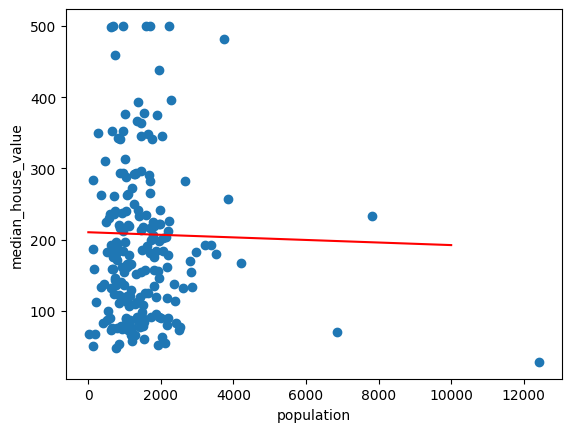

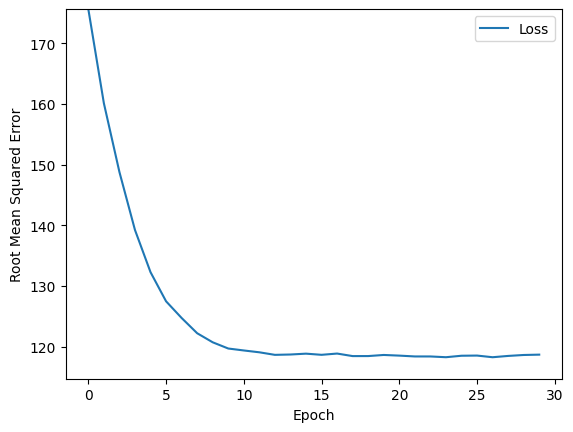

feature label   predicted
		value
		in thousand$
-----------------------------
 1286     53             208
 1867     92             207
 2191     69             206
 1052     62             208
 1647     80             207
 2312    295             206
 1604    500             207
 1066    342             208
  338    118             210
 1604    128             207


In [65]:
my_feature = "population"

learning_rate = 0.01
epochs = 30
batch_size = 3

my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

Same or slightly worse at predictions than total rooms

## Defining a synthetic feature

1. Create a synthetic feature that is a ratio of total_rooms to population
2. Tune the hyperparameters
3. Determine whether the synthetic feature produces a lower loss value than any of the single features tried earlier

Epoch 1/80
567/567 [==============================] - 0s 456us/step - loss: 45208.6641 - root_mean_squared_error: 212.6233
Epoch 2/80
567/567 [==============================] - 0s 457us/step - loss: 30115.4180 - root_mean_squared_error: 173.5379
Epoch 3/80
567/567 [==============================] - 0s 440us/step - loss: 21008.1367 - root_mean_squared_error: 144.9418
Epoch 4/80
567/567 [==============================] - 0s 473us/step - loss: 16651.8008 - root_mean_squared_error: 129.0419
Epoch 5/80
567/567 [==============================] - 0s 448us/step - loss: 15208.8369 - root_mean_squared_error: 123.3241
Epoch 6/80
567/567 [==============================] - 0s 457us/step - loss: 14969.8320 - root_mean_squared_error: 122.3513
Epoch 7/80
567/567 [==============================] - 0s 456us/step - loss: 14918.7480 - root_mean_squared_error: 122.1423
Epoch 8/80
567/567 [==============================] - 0s 456us/step - loss: 14806.5020 - root_mean_squared_error: 121.6820
Epoch 9/80
567/5

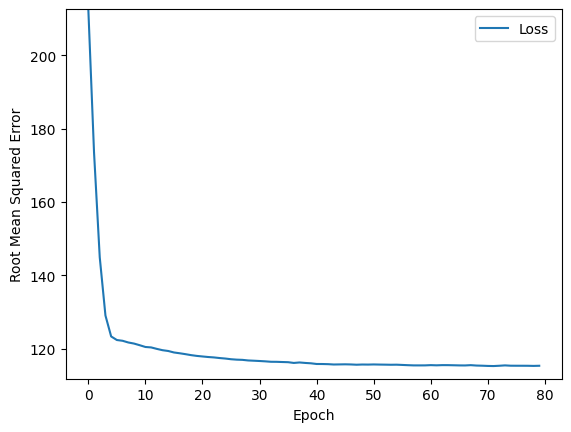

feature label   predicted
		value
		in thousand$
-----------------------------
    2     53             190
    2     92             201
    2     69             195
    2     62             211
    1     80             187
    2    295             224
    2    500             210
    2    342             222
    4    118             284
    2    128             214
    2    187             223
    3     80             233
    2    112             224
    2     95             219
    2     69             210


In [68]:
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]
my_feature = "rooms_per_person"

learning_rate = 0.03
epochs = 80
batch_size = 30

my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                       my_feature, my_label,
                                       epochs, batch_size)
plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)

## Find features whose raw values correlate with the label

#### A correlation matrix indicates how each atribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:
1. 1.0: perfect positive correlation (when one attribute rises, the othe attributes rises)
2. -1.0: perfect negative correlation (when one attribute rises, the other attributes fall)
3. 0.0: no correlation (the two columns are not linearly related)
In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2

In [69]:
#generate a correlation matrix
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_person
longitude,1.0,-0.9,-0.1,0.0,0.1,0.1,0.1,-0.0,-0.0,-0.1
latitude,-0.9,1.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.1,-0.1,0.1
housing_median_age,-0.1,0.0,1.0,-0.4,-0.3,-0.3,-0.3,-0.1,0.1,-0.1
total_rooms,0.0,-0.0,-0.4,1.0,0.9,0.9,0.9,0.2,0.1,0.1
total_bedrooms,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,-0.0,0.0,0.0
population,0.1,-0.1,-0.3,0.9,0.9,1.0,0.9,-0.0,-0.0,-0.1
households,0.1,-0.1,-0.3,0.9,1.0,0.9,1.0,0.0,0.1,-0.0
median_income,-0.0,-0.1,-0.1,0.2,-0.0,-0.0,0.0,1.0,0.7,0.2
median_house_value,-0.0,-0.1,0.1,0.1,0.0,-0.0,0.1,0.7,1.0,0.2
rooms_per_person,-0.1,0.1,-0.1,0.1,0.0,-0.1,-0.0,0.2,0.2,1.0
